In [2]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

C:\Users\rahma\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
data = pd.read_csv('C:/Users/rahma/OneDrive/Desktop/spam.csv', encoding='latin-1')
data.head(n=20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.rename(columns={'v1': 'class', 'v2': 'message'}, inplace=True)
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.count()

class      5572
message    5572
dtype: int64

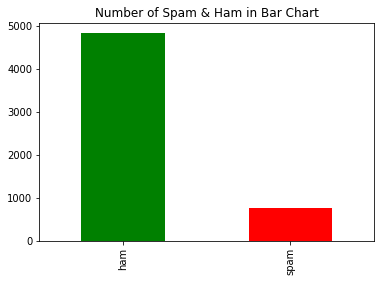

In [8]:
count_Class=pd.value_counts(data["class"], sort= True)
count_Class.plot(kind= 'bar', color= ["green", "red"])
plt.title('Number of Spam & Ham in Bar Chart')
plt.show()

In [9]:
count1 = Counter(" ".join(data[data['class']=='ham']["message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['class']=='spam']["message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

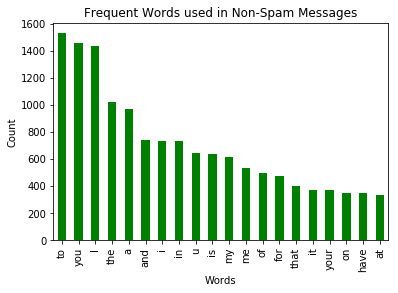

In [10]:
df1.plot.bar(legend = False, color = 'green')
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('Frequent Words used in Non-Spam Messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

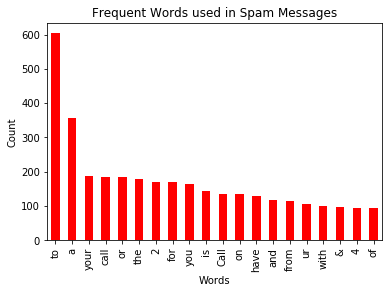

In [11]:
df2.plot.bar(legend = False, color = 'red')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('Frequent Words used in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [12]:
data['class'].apply(len).min()

3

In [13]:
data['message'].apply(len).min()

2

In [14]:
set(data['class'])

{'ham', 'spam'}

In [15]:
data['label'] = data['class'].apply(lambda label: 0 if label == 'ham' else 1)
data.head()

,class,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [16]:
data.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


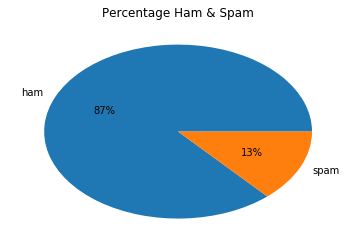

In [17]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Percentage Ham & Spam')
plt.ylabel('')
plt.show()

In [18]:
print('Percentage of spams: {0}%'.format(round(100 * data['label'].sum() / len(data['label']), 2)))

Percentage of spams: 13.41%


In [19]:
spams = data['message'].iloc[(data['label'] == 1).values]
hams = data['message'].iloc[(data['label'] == 0).values]
print(spams[:10])
print(hams[:10])

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
12    URGENT! You have won a 1 week FREE membership ...
15    XXXMobileMovieClub: To use your credit, click ...
19    England v Macedonia - dont miss the goals/team...
34    Thanks for your subscription to Ringtone UK yo...
42    07732584351 - Rodger Burns - MSG = We tried to...
Name: message, dtype: object
0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
6     Even my brother is not like to speak with me. ...
7     As per your request 'Melle Melle (Oru Minnamin...
10    I'm gonna be home soon and i don't want to tal...
13    I've been sea

In [20]:
data['message_length'] = data['message'].apply(lambda message: len(message))
data.head()

,class,message,label,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5,1,'Messages lengths of Ham & Spam')

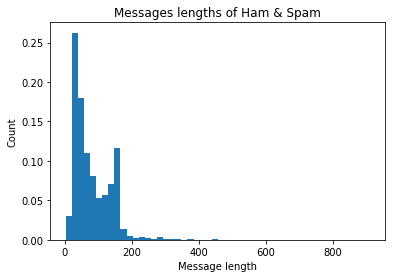

In [21]:
plt.hist(data['message_length'], bins=50, weights=np.ones(len(data))/len(data))
plt.xlabel('Message length')
plt.ylabel('Count')
plt.title('Messages lengths of Ham & Spam')

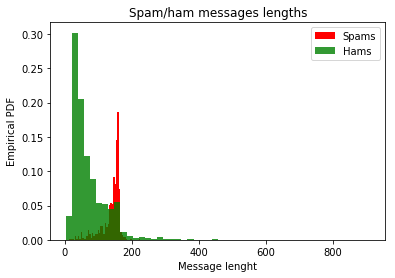

In [22]:
plt.hist(spams.apply(lambda x: len(x)),
         bins=50,
         weights=np.ones(len(spams)) / len(spams),
         facecolor='r',
         label='Spams')
plt.hist(hams.apply(lambda x: len(x)),
         bins=50,
         weights=np.ones(len(hams)) / len(hams),
         facecolor='g',
         alpha=0.8,
         label='Hams')
plt.xlabel('Message lenght')
plt.ylabel('Empirical PDF')
plt.title('Spam/ham messages lengths')
plt.legend()

In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
spam_tokens = []
for spam in spams:
    spam_tokens += nltk.tokenize.word_tokenize(spam)
ham_tokens = []
for ham in hams:
    ham_tokens += nltk.tokenize.word_tokenize(ham)
print(spam_tokens[:10])
print(ham_tokens[:10])

In [ ]:
stop_words = ['.', 'to', '!', ',', 'a', '&', 
              'or', 'the', '?', ':', 'is', 'for',
              'and', 'from', 'on', '...', 'in', ';',
              'that', 'of']
for tokens in [spam_tokens, ham_tokens]:
    for stop_word in stop_words:
        try:
            while True:
                tokens.remove(stop_word)
        except ValueError:  # all occurrences of the stop word have been removed
            pass

In [ ]:
most_common_tokens_in_spams = Counter(spam_tokens).most_common(20)
most_common_tokens_in_hams = Counter(ham_tokens).most_common(20)
print(most_common_tokens_in_spams)
print(most_common_tokens_in_hams)

In [ ]:
data, test_data = train_test_split(data, test_size=0.3)
print('Train-valid data length: {0}'.format(len(data)))
print('Test data length: {0}'.format(len(test_data)))

In [123]:
binary_vectorizer = CountVectorizer(binary=True)
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [80]:
data['message'][:20].apply(process)

0     [go, jurong, point, crazi, avail, bugi, n, gre...
1                          [ok, lar, joke, wif, u, oni]
2     [free, entri, 2, wkli, comp, win, fa, cup, fin...
3         [u, dun, say, earli, hor, u, c, alreadi, say]
4     [nah, dont, think, goe, usf, live, around, tho...
5     [freemsg, hey, darl, 3, week, word, back, id, ...
6     [even, brother, like, speak, treat, like, aid,...
7     [per, request, mell, mell, oru, minnaminungint...
8     [winner, valu, network, custom, select, receiv...
9     [mobil, 11, month, u, r, entitl, updat, latest...
10    [im, gonna, home, soon, dont, want, talk, stuf...
11    [six, chanc, win, cash, 100, 20000, pound, txt...
12    [urgent, 1, week, free, membership, å£100000, ...
13    [ive, search, right, word, thank, breather, pr...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                     [oh, kim, watch]
17    [eh, u, rememb, 2, spell, name, ye, v, nau

In [124]:
def feature_extraction(df, test=False):
    if not test:
        tfidf_vectorizer.fit(df['message'])
    
    X = np.array(tfidf_vectorizer.transform(df['message']).todense())
    return X

In [ ]:
train_df, valid_df = train_test_split(data, test_size=0.3)

X_train = feature_extraction(train_df)
y_train = train_df['class'].values

X_valid = feature_extraction(valid_df, test=True)
y_valid = valid_df['class'].values

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])

In [ ]:
tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(data['message'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['message'], df['label'], test_size=0.2)